In [1]:
import json
import os
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import yaml

from mne_bids import BIDSPath

plt.rcParams.update({
    "font.family": "sans-serif", 
    "font.size": 14
})

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
with open(Path(os.path.abspath('')).parents[2] / "motor-decoding/mtsmorf/move_exp/config.yml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

bids_root = Path(config["bids_root"])
derivatives_path = Path(config["derivatives_path"])
results_path = Path(config["results_path"])

print(f"bids_root: {bids_root}")
print(f"derivatives_path: {derivatives_path}")
print(f"results_path: {results_path}")

bids_root: /Users/ChesterHuynh/OneDrive - Johns Hopkins/efri
derivatives_path: /Users/ChesterHuynh/OneDrive - Johns Hopkins/efri/derivatives
results_path: /Users/ChesterHuynh/OneDrive - Johns Hopkins/efri/derivatives/mtmorf


In [3]:
import json
subjects = ["efri07", "efri13", "efri14", "efri18", "efri20"]

subject_clf_scores = {}
clf_names = ["MT-MORF", "SPORF", "RF", "kNN", "XGB", "MLP", "ConvNet"]
for subject in subjects:
    subject_clf_scores[subject] = {}
    for clf_name in clf_names:
        with open(
            derivatives_path 
            / f"workstation_output/mtmorf/decode_directionality/{subject}/tmin=-0.2_tmax=0.5/time_domain/{subject}_{clf_name}_results.json", "r"
        ) as f:
            subject_clf_scores[subject][clf_name] = json.load(f)

auroc_df = []
for subject, clf_scores in subject_clf_scores.items():
    for clf_name, scores in clf_scores.items():
        auroc_df.append([subject, clf_name, scores["test_roc_auc_ovr"]])
auroc_df = pd.DataFrame(auroc_df, columns=["Subject", "Classifier Name", "ROC AUC OvR"])
auroc_df = pd.DataFrame({"Subject": np.repeat(auroc_df["Subject"].values, auroc_df["ROC AUC OvR"].str.len()),
                         "Classifier Name": np.repeat(auroc_df["Classifier Name"].values, auroc_df["ROC AUC OvR"].str.len()),
                         "ROC AUC OvR": np.concatenate(auroc_df["ROC AUC OvR"].values)})

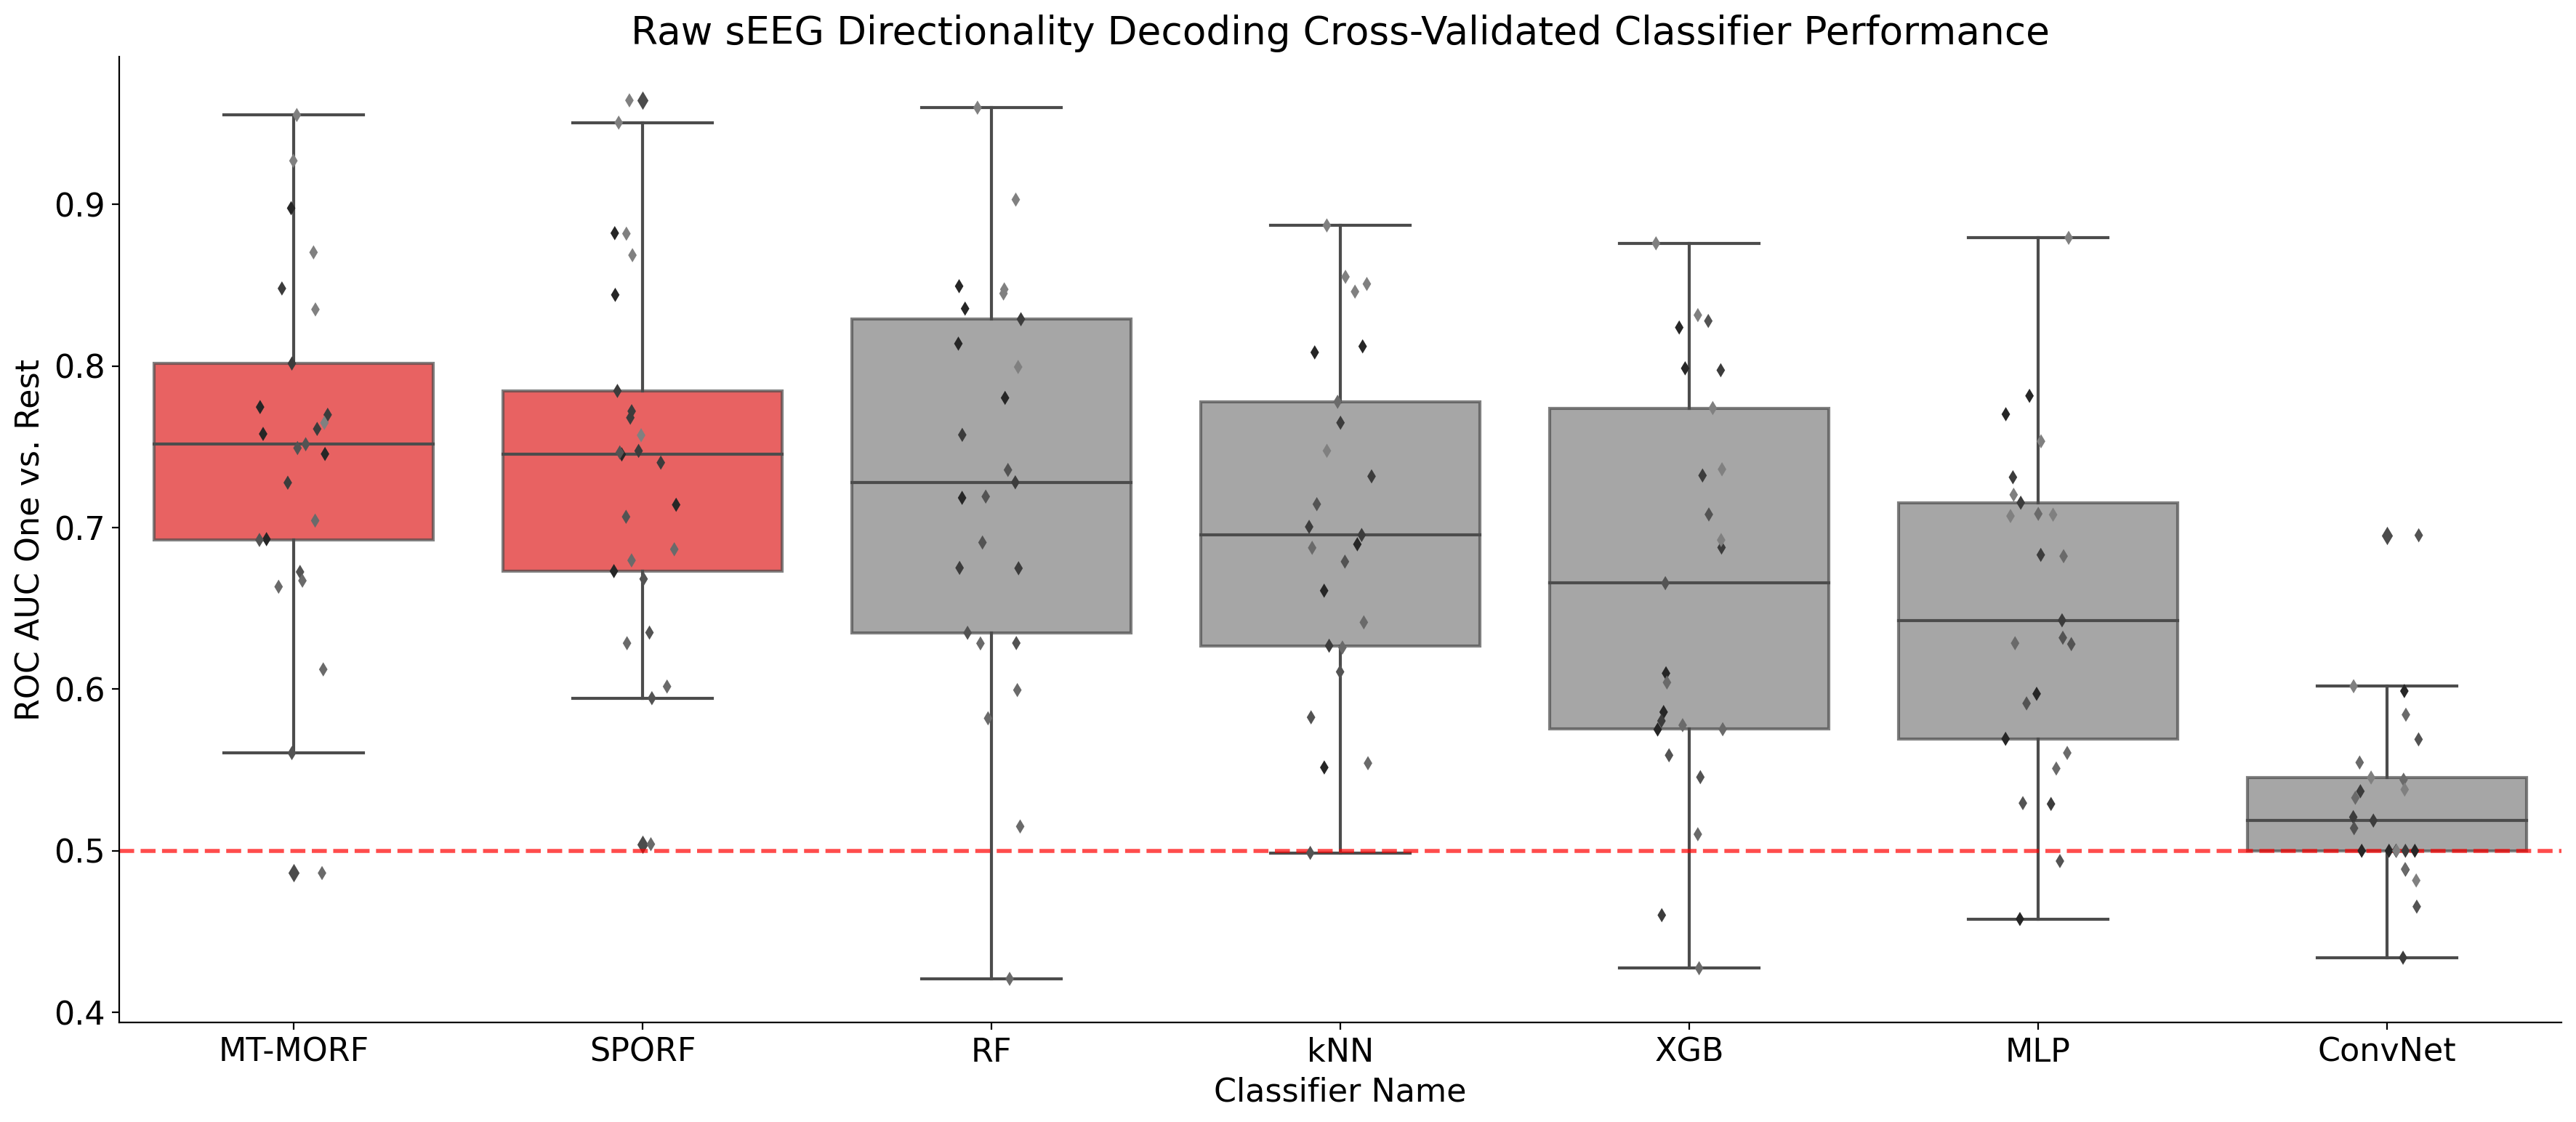

In [4]:
plt.rcParams.update({"font.size": 16})
fig, ax = plt.subplots(figsize=(18, 8), dpi=200)
sns.stripplot(x="Classifier Name", y="ROC AUC OvR", hue="Subject", marker='d', data=auroc_df, dodge=False, ax=ax, color="gray")
palette = {"MT-MORF": "r", "SPORF": "r", "RF": "gray", "kNN": "gray", "XGB": "gray", "MLP": "gray", "ConvNet": "gray"}
sns.boxplot(x="Classifier Name", y="ROC AUC OvR", data=auroc_df, dodge=False, boxprops=dict(alpha=0.7), ax=ax, palette=palette)
ax.axhline(0.5, label="Chance", ls="--", lw=2, c='r', alpha=0.7)
ax.set_title(f"Raw sEEG Directionality Decoding Cross-Validated Classifier Performance")
ax.set_ylabel("ROC AUC One vs. Rest")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='x', which='minor', bottom=False)
# ax.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend([],[], frameon=False)
fig.tight_layout();

In [6]:
import json
subjects = ["efri07", "efri13", "efri14", "efri18", "efri20"]

subject_clf_scores = {}
clf_names = ["MT-MORF", "SPORF", "RF", "kNN", "XGB", "MLP", "ConvNet"]
for subject in subjects:
    subject_clf_scores[subject] = {}
    for clf_name in clf_names:
        with open(
            derivatives_path 
            / f"workstation_output/mtmorf/decode_directionality/{subject}/tmin=-0.2_tmax=0.5/time_domain/{subject}_{clf_name}_results.json", "r"
        ) as f:
            subject_clf_scores[subject][clf_name] = json.load(f)

acc_df = []
for subject, clf_scores in subject_clf_scores.items():
    for clf_name, scores in clf_scores.items():
        acc_df.append([subject, clf_name, scores["test_accuracy"]])
acc_df = pd.DataFrame(acc_df, columns=["Subject", "Classifier Name", "Accuracy"])
acc_df = pd.DataFrame({"Subject": np.repeat(acc_df["Subject"].values, acc_df["Accuracy"].str.len()),
                       "Classifier Name": np.repeat(acc_df["Classifier Name"].values, acc_df["Accuracy"].str.len()),
                       "Accuracy": np.concatenate(acc_df["Accuracy"].values)})

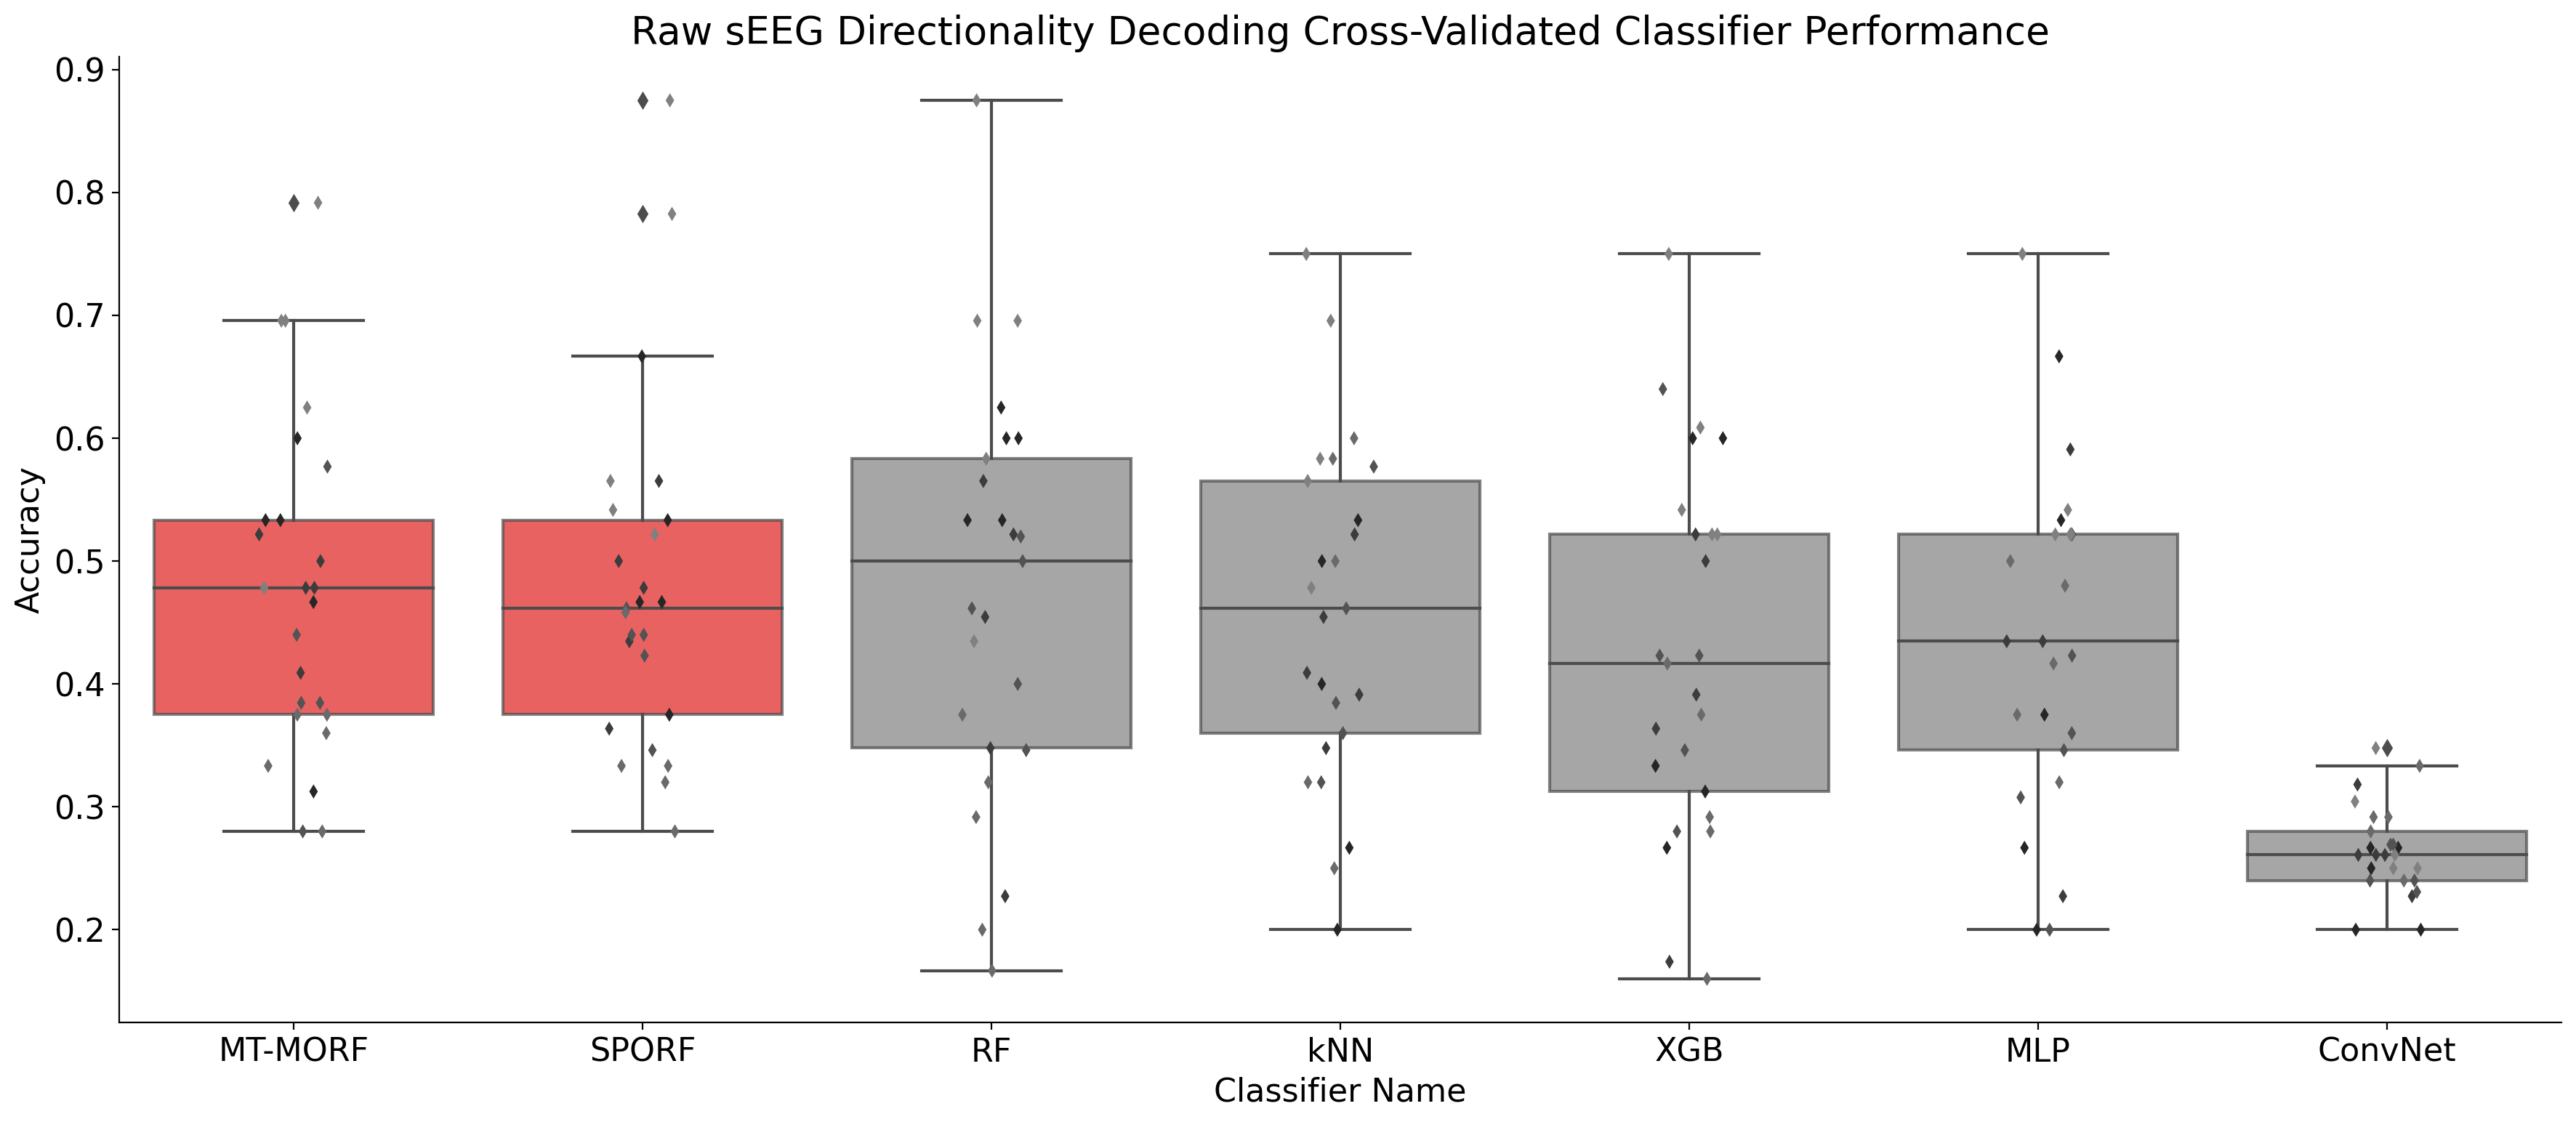

In [7]:
plt.rcParams.update({"font.size": 16})
fig, ax = plt.subplots(figsize=(18, 8), dpi=200)
sns.stripplot(x="Classifier Name", y="Accuracy", hue="Subject", marker='d', data=acc_df, dodge=False, ax=ax, color="gray")
palette = {"MT-MORF": "r", "SPORF": "r", "RF": "gray", "kNN": "gray", "XGB": "gray", "MLP": "gray", "ConvNet": "gray"}
sns.boxplot(x="Classifier Name", y="Accuracy", data=acc_df, dodge=False, boxprops=dict(alpha=0.7), ax=ax, palette=palette)
ax.set_title(f"Raw sEEG Directionality Decoding Cross-Validated Classifier Performance")
ax.set_ylabel("Accuracy")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='x', which='minor', bottom=False)
ax.legend([],[], frameon=False)
fig.tight_layout();

In [8]:
import json
subjects = ["efri07", "efri13", "efri14", "efri18", "efri20"]

subject_clf_scores = {}
clf_names = ["MT-MORF", "SPORF", "RF", "kNN", "XGB", "MLP", "ConvNet"]
for subject in subjects:
    subject_clf_scores[subject] = {}
    for clf_name in clf_names:
        with open(
            derivatives_path 
            / f"workstation_output/mtmorf/decode_directionality/{subject}/tmin=-0.2_tmax=0.5/time_domain/{subject}_{clf_name}_results.json", "r"
        ) as f:
            subject_clf_scores[subject][clf_name] = json.load(f)

cohen_df = []
for subject, clf_scores in subject_clf_scores.items():
    for clf_name, scores in clf_scores.items():
        cohen_df.append([subject, clf_name, scores["test_cohen_kappa_score"]])
cohen_df = pd.DataFrame(cohen_df, columns=["Subject", "Classifier Name", "Cohen Kappa Score"])
cohen_df = pd.DataFrame({"Subject": np.repeat(cohen_df["Subject"].values, cohen_df["Cohen Kappa Score"].str.len()),
                         "Classifier Name": np.repeat(cohen_df["Classifier Name"].values, cohen_df["Cohen Kappa Score"].str.len()),
                         "Cohen Kappa Score": np.concatenate(cohen_df["Cohen Kappa Score"].values)})

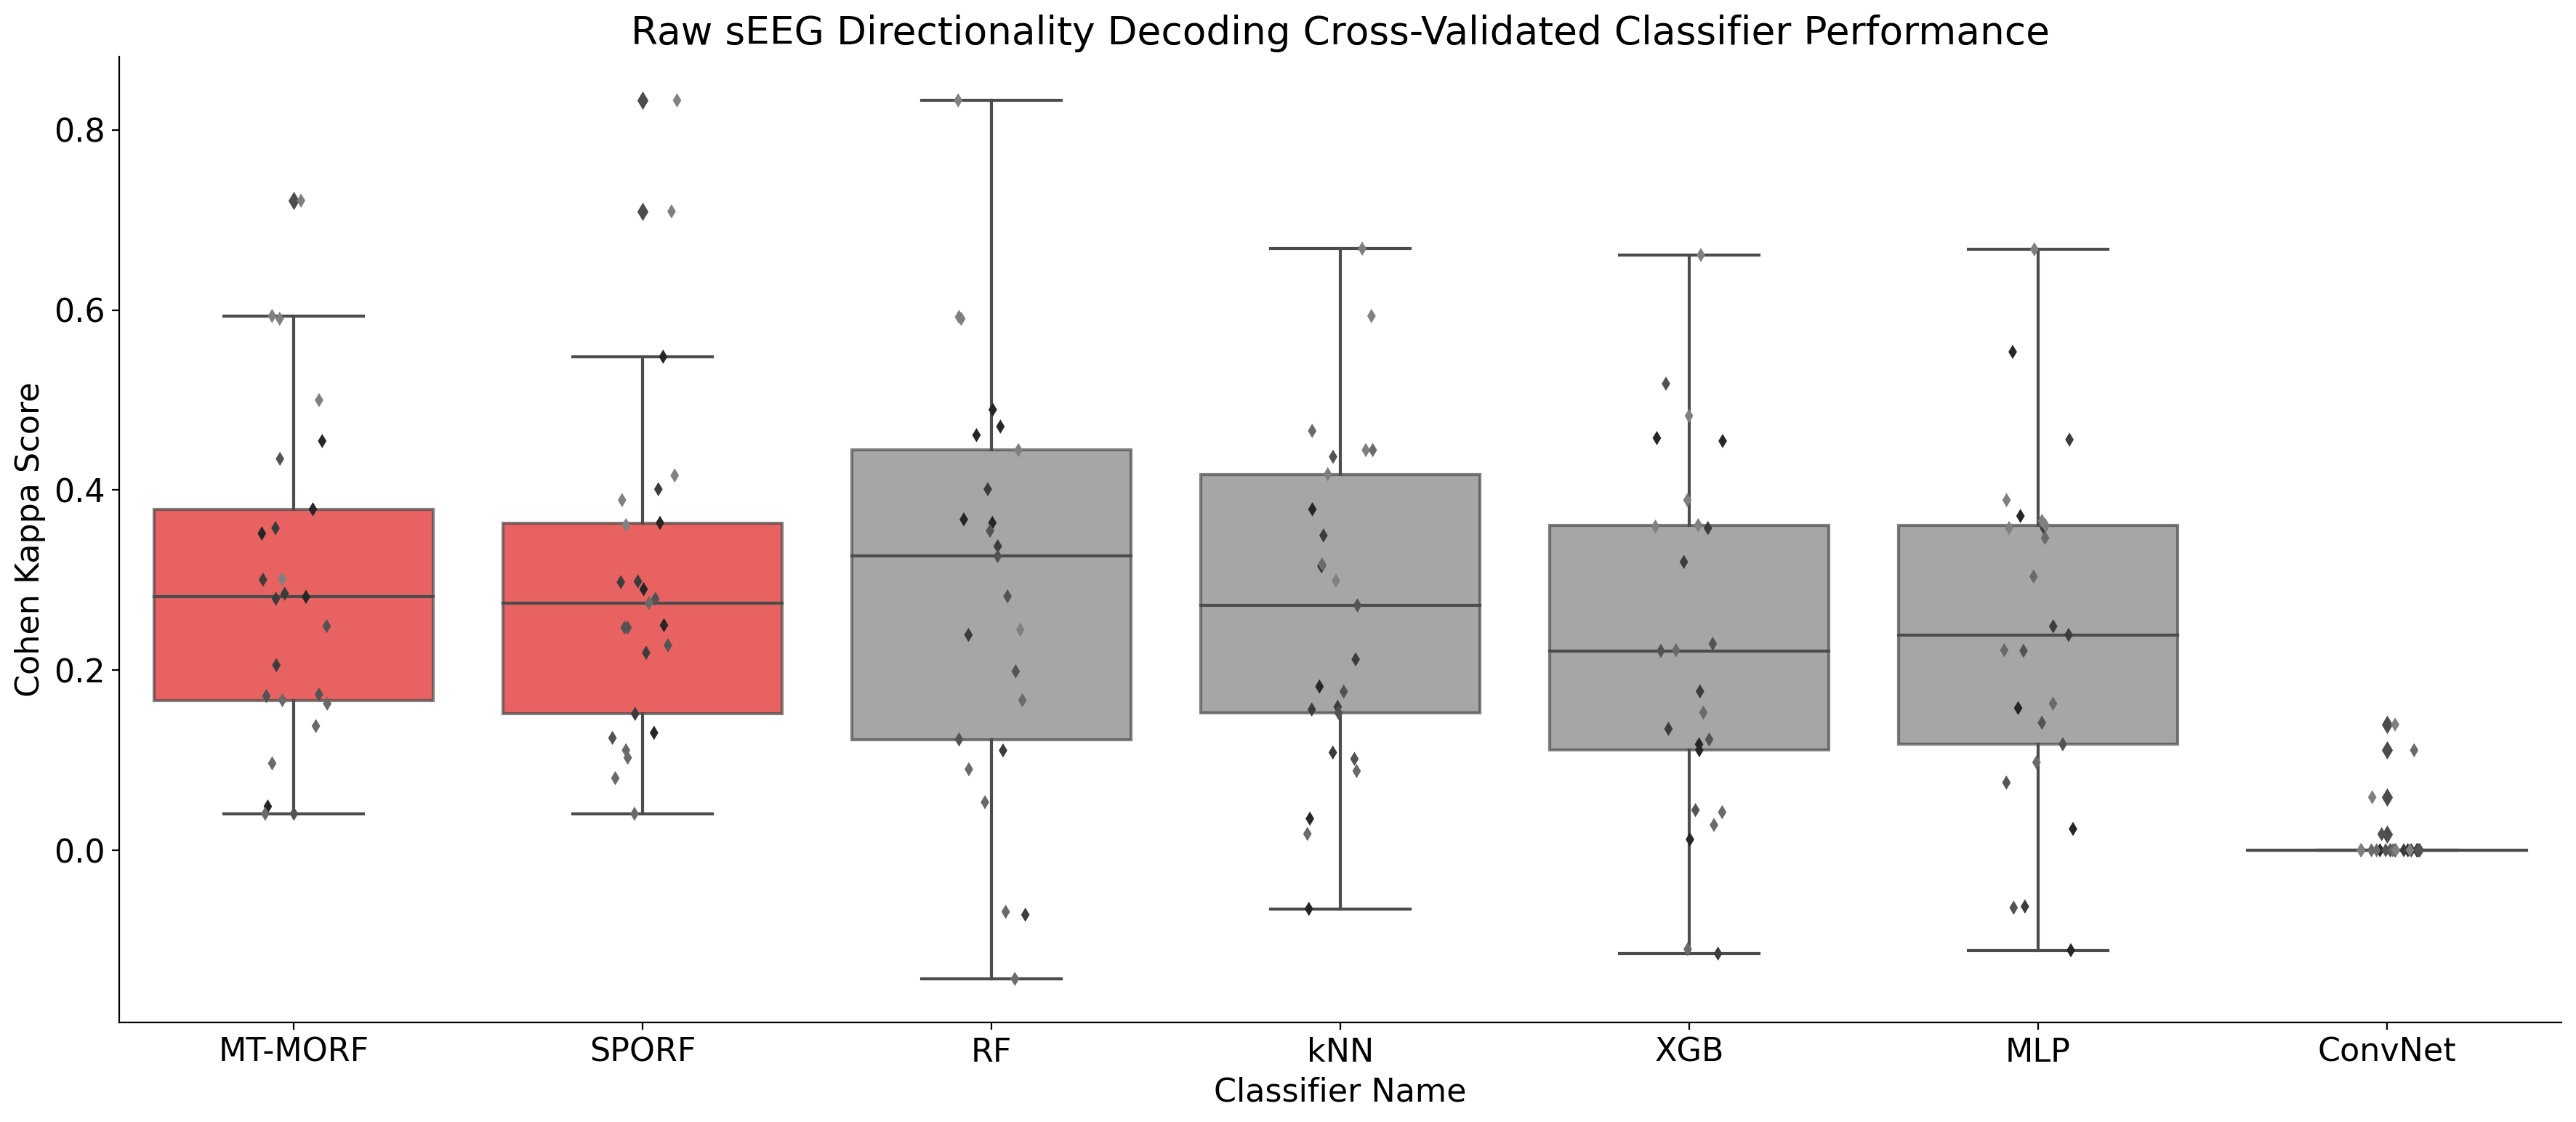

In [9]:
plt.rcParams.update({"font.size": 16})
fig, ax = plt.subplots(figsize=(18, 8), dpi=200)
sns.stripplot(x="Classifier Name", y="Cohen Kappa Score", hue="Subject", marker='d', data=cohen_df, dodge=False, ax=ax, color="gray")
palette = {"MT-MORF": "r", "SPORF": "r", "RF": "gray", "kNN": "gray", "XGB": "gray", "MLP": "gray", "ConvNet": "gray"}
sns.boxplot(x="Classifier Name", y="Cohen Kappa Score", data=cohen_df, dodge=False, boxprops=dict(alpha=0.7), ax=ax, palette=palette)
ax.set_title(f"Raw sEEG Directionality Decoding Cross-Validated Classifier Performance")
ax.set_ylabel("Cohen Kappa Score")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='x', which='minor', bottom=False)
ax.legend([],[], frameon=False)
fig.tight_layout();